In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import utils as helper


### Allow printing of all data columns

In [74]:

pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(threshold=np.inf)

In [75]:
data = pd.read_csv("kidney_disease.csv")
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


### Data Exploration

In [76]:

data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

### Convert wc, rc and pcv to numeric

In [77]:
data.wc=pd.to_numeric(data.wc,errors='coerce')
data.rc=pd.to_numeric(data.rc,errors='coerce')
data.pcv=pd.to_numeric(data.pcv,errors='coerce')
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

### Remove ending Tab

In [78]:
def detab(x):
  if x=='ckd\t':
    return 'ckd'
  else:
    return x

In [79]:
data.classification=data.classification.apply(detab,convert_dtype=True)
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [80]:
def clas(x):
  if x=='ckd':
    return 1
  elif x=='notckd':
    return 0

In [81]:
data.classification=data.classification.apply(clas,convert_dtype=True)
data.classification.unique()

array([1, 0])

### Remove all the rows that contain null values

In [82]:
data = data.dropna()
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,274.841772,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772,0.272152
std,102.998517,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364,0.446483
min,3.000000,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000,0.000000
25%,243.000000,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,4.500000,0.000000
50%,298.500000,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,4.950000,0.000000
75%,355.750000,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,5.600000,1.000000
max,399.000000,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


<Axes: xlabel='classification', ylabel='count'>

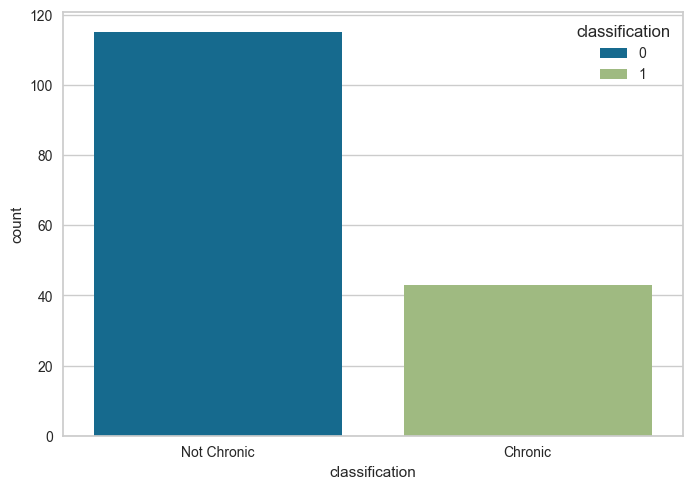

In [83]:
plt.xticks(ticks=[0, 1], labels = ["Not Chronic", "Chronic"])
sns.countplot(x='classification',data=data, hue='classification')

### Boxplot to check outliers

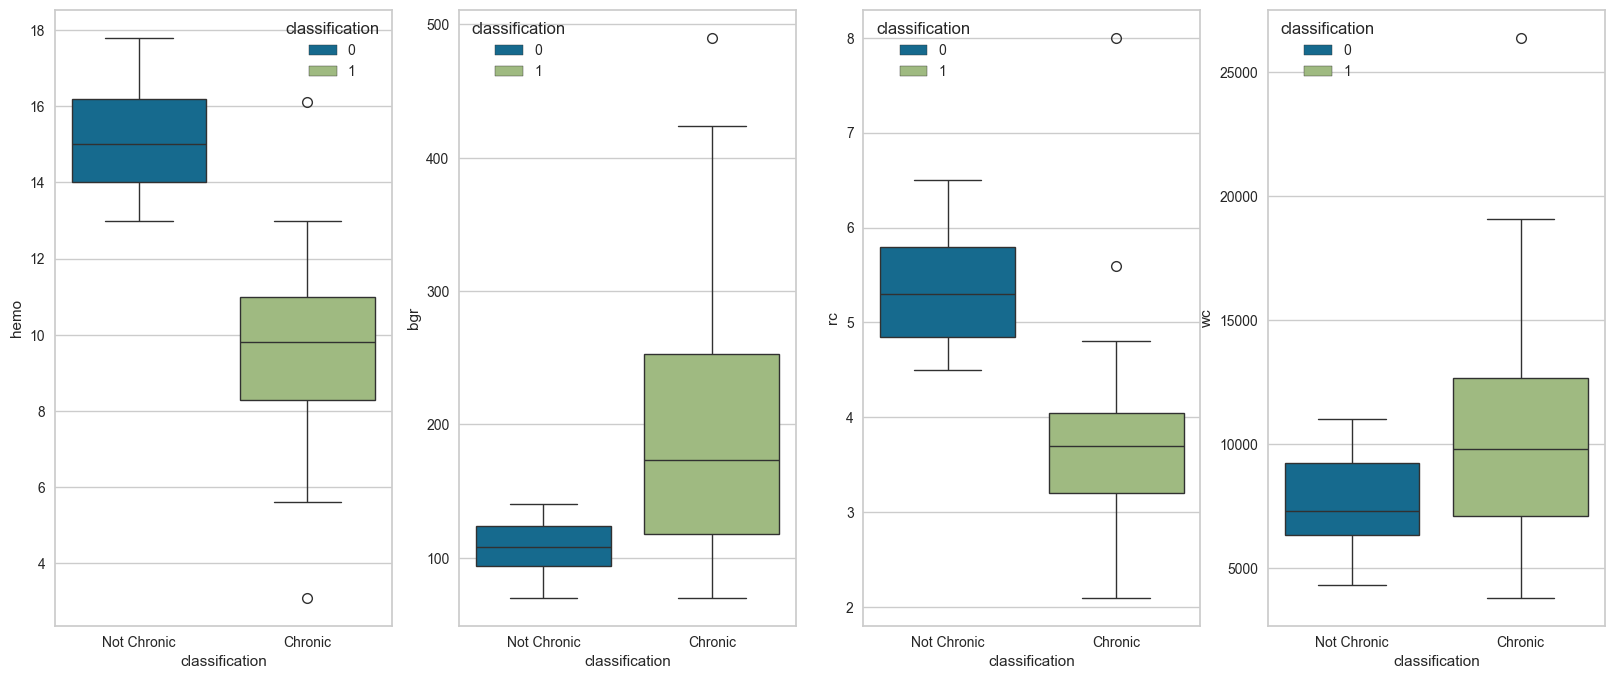

In [84]:
plt.figure(1,figsize=(20,8))
plt.subplot(141)
sns.boxplot(x='classification',y='hemo',data=data, hue='classification')
plt.xticks(ticks=[0, 1], labels = ["Not Chronic", "Chronic"])
plt.subplot(142)
sns.boxplot(x='classification',y='bgr',data=data, hue='classification')
plt.xticks(ticks=[0, 1], labels = ["Not Chronic", "Chronic"])
plt.subplot(143)
sns.boxplot(x='classification',y='rc',data=data, hue='classification')
plt.xticks(ticks=[0, 1], labels = ["Not Chronic", "Chronic"])
plt.subplot(144)
sns.boxplot(x='classification',y='wc',data=data, hue='classification')
plt.xticks(ticks=[0, 1], labels = ["Not Chronic", "Chronic"])
plt.show()

### Correlation Matrix of numeric fields

In [95]:
data.corr(numeric_only=True)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
id,1.000000,-0.236508,-0.282317,0.676958,-0.745822,-0.331072,-0.449157,-0.521873,-0.523525,0.553574,-0.136201,0.693769,0.712855,-0.306113,0.627569,-0.838812
age,-0.236508,1.000000,0.079712,-0.277303,0.253380,0.207711,0.301915,0.190636,0.189721,-0.102933,0.006866,-0.245645,-0.235116,0.153132,-0.242235,0.305119
bp,-0.282317,0.079712,1.000000,-0.198897,0.322507,0.243828,0.190113,0.316287,0.386551,-0.224710,0.127801,-0.282365,-0.353504,0.008274,-0.228533,0.326567
sg,0.676958,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.544781,-0.545319,-0.563122,0.539285,-0.075057,0.682086,0.678472,-0.288930,0.619092,-0.790102
al,-0.745822,0.253380,0.322507,-0.712331,1.000000,0.521448,0.518123,0.661940,0.702889,-0.599334,0.209492,-0.784745,-0.775528,0.314574,-0.640099,0.925816
su,-0.331072,0.207711,0.243828,-0.448477,0.521448,1.000000,0.730050,0.312259,0.347196,-0.242491,0.271954,-0.385511,-0.404821,0.201000,-0.377726,0.510615
bgr,-0.449157,0.301915,0.190113,-0.544781,0.518123,0.730050,1.000000,0.326496,0.331284,-0.284968,0.102226,-0.434158,-0.443818,0.212093,-0.418085,0.591217
bu,-0.521873,0.190636,0.316287,-0.545319,0.661940,0.312259,0.326496,1.000000,0.896094,-0.492778,0.245427,-0.712196,-0.706582,0.128961,-0.621456,0.677611
sc,-0.523525,0.189721,0.386551,-0.563122,0.702889,0.347196,0.331284,0.896094,1.000000,-0.532575,0.141896,-0.723937,-0.726187,0.123953,-0.639021,0.702206
sod,0.553574,-0.102933,-0.224710,0.539285,-0.599334,-0.242491,-0.284968,-0.492778,-0.532575,1.000000,-0.051037,0.583001,0.570045,-0.176238,0.465125,-0.640902


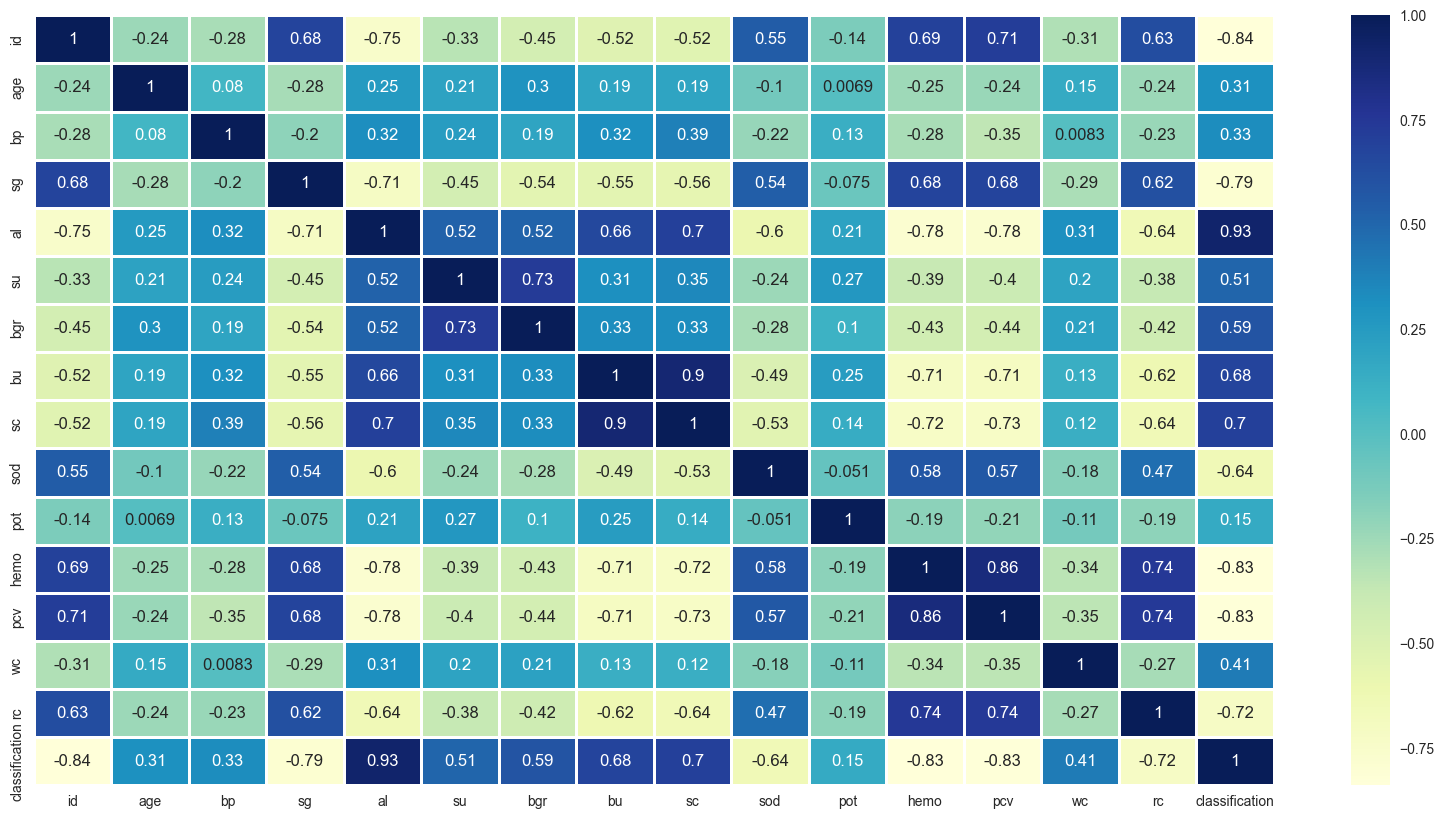

In [85]:
plt.figure(1,figsize=(20,10))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='YlGnBu',linewidth=0.8)
plt.show()

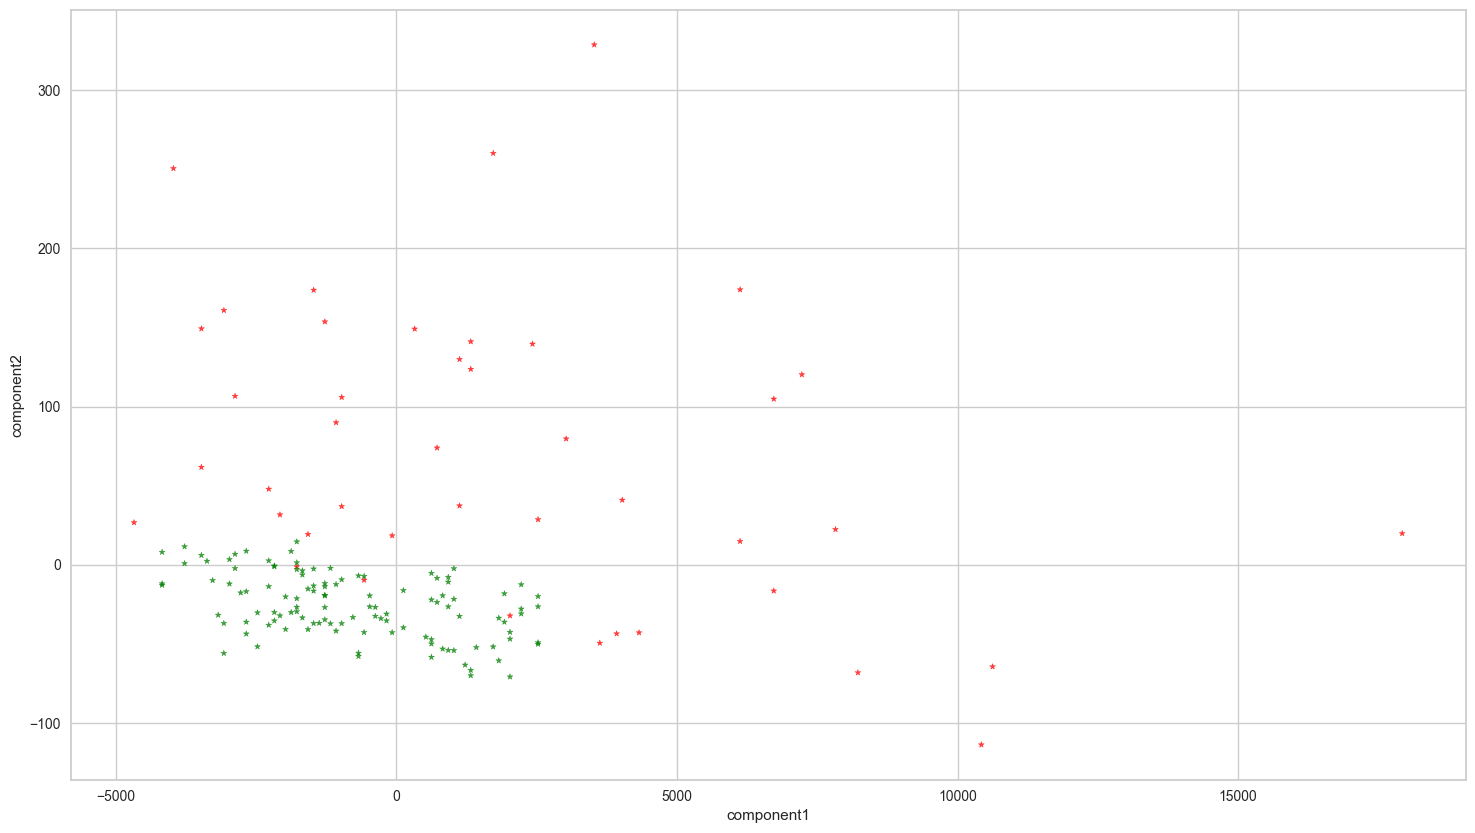

In [98]:

from sklearn.decomposition import PCA
df = data[['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']]
#df = data.copy()

pca = PCA(n_components = 2)
pca.fit(df)
T = pca.transform(df)
labels = ['red' if i==1 else 'green' for i in data.classification]
plt.figure(1, figsize=(18,10))
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, False)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='*', c=labels, alpha=0.75, ax=ax)
plt.show()

In [91]:
T.describe()

,component1,component2
count,1.580000e+02,1.580000e+02
mean,-9.210073e-14,-2.878148e-15
std,3.126919e+03,6.676079e+01
min,-4.675849e+03,-1.138612e+02
25%,-1.951089e+03,-3.702780e+01
50%,-6.762386e+02,-1.803422e+01
75%,1.298725e+03,5.321617e+00
max,1.792435e+04,3.288667e+02
